<a href="https://colab.research.google.com/github/rafaelrubo/python-geociencias/blob/main/python_geociencias03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Aplicado às Geociências
##Parte 03
#####Rafael Rubo
#####rafaelrubo@gmail.com

In [1]:
lat, lon = (10.0, -45.0)

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 10.0, Longitude: -45.0


In [2]:
from geopy.distance import geodesic

ponto1 = (10.0, -45.0)
ponto2 = (12.0, -44.0)

print(geodesic(ponto1, ponto2).km)  # Distância em km

246.74879497838853


In [3]:
from shapely.geometry import Point

ponto = Point(1, 1)

print(ponto)

POINT (1 1)


In [4]:
print(ponto.x, ponto.y)  # Coordenadas x e y do ponto

1.0 1.0


<Axes: >

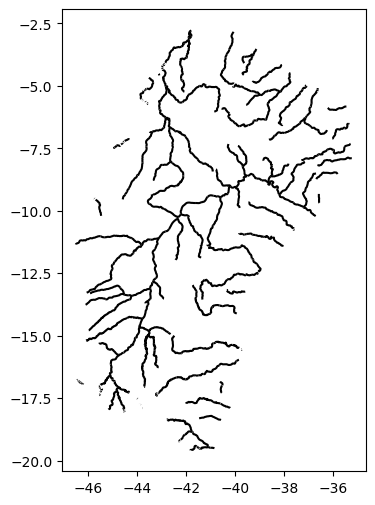

In [5]:
import geopandas as gpd

# Carregando o shapefile ​
gdf = gpd.read_file('Rios-Principais-SAB.shp')
# Shapefile disponibilizado pelo Instituto Nacional do Semiárido - INSA
# https://www.gov.br/insa/pt-br/centrais-de-conteudo/mapas/mapas-em-shapefile

# Plotando o shapefile
gdf.plot(figsize=(8,6), cmap='Set3', edgecolor='black')

In [6]:
print(gdf.columns)  # Lista de atributos disponíveis

Index(['OBJECTID', 'NOME', 'Shape_Leng', 'geometry'], dtype='object')


In [7]:
print(gdf.crs)  # Sistema de coordenadas do shapefile

EPSG:4674


<Axes: >

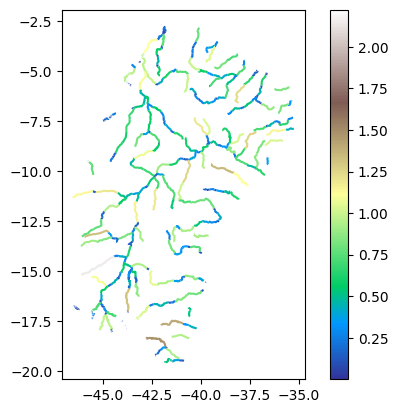

In [10]:
gdf = gpd.read_file('Rios-Principais-SAB.shp')
gdf.plot(column="Shape_Leng", cmap="terrain", legend=True)

In [11]:
# Carregando shp com projeção original ​

gdf = gpd.read_file('Rios-Principais-SAB.shp')
print("Projeção original:", gdf.crs)

Projeção original: EPSG:4674


In [12]:
# Convertendo para WGS 84​

gdf_wgs84 = gdf.to_crs(epsg=4326)

print("Nova projeção:", gdf_wgs84.crs)

Nova projeção: EPSG:4326


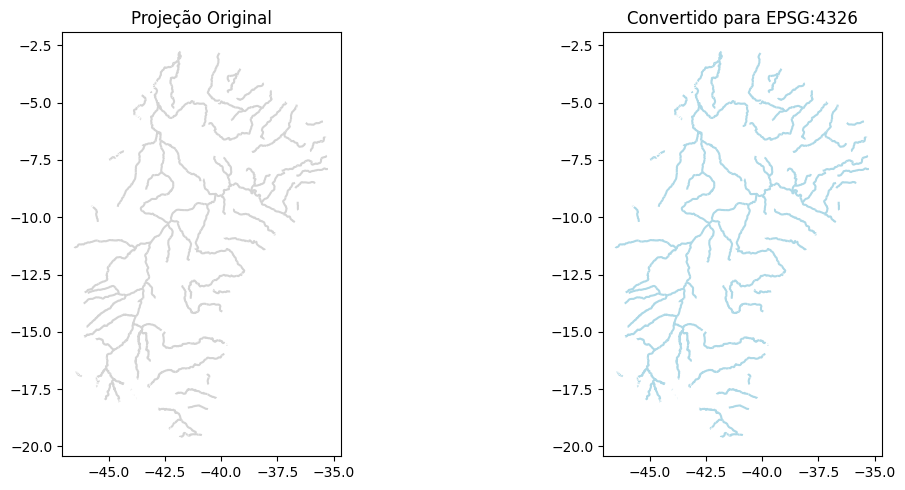

In [13]:
import matplotlib.pyplot as plt


# Plotando lado a lado para comparação  ​

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
gdf.plot(ax=axes[0], edgecolor='black', color='lightgray')
axes[0].set_title("Projeção Original")
gdf_wgs84.plot(ax=axes[1], edgecolor='black', color='lightblue')
axes[1].set_title("Convertido para EPSG:4326")
plt.tight_layout()

plt.show()

In [15]:
import folium

# Criando um mapa centralizado em Bauru/SP​
mapa = folium.Map(location=[-22, -49], zoom_start=6)

# Adicionando um marcador para ilustrar um ponto​
folium.Marker(location=[-22, -49], popup="Ponto de Interesse Geológico", icon=folium.Icon(color="blue", icon="info-sign")).add_to(mapa)

# Exibindo o mapa (em um notebook Jupyter)​
mapa

In [16]:
mapa.save("mapa_interativo.html")